In [2]:
from google.colab import files
uploaded=files.upload()

Saving human_disease_prediction_150.csv to human_disease_prediction_150.csv


Dataset Overview:
Number of records: 150
Number of features: 11

First 5 records:
     Name  Age  Gender  Weight    Symptom_1    Symptom_2 Symptom_3 Duration  \
0   Surya   20    Male    60.3        Fever       Nausea  Sneezing   3 days   
1   Pooja   64  Female    56.8    Back pain   Chest pain  Headache   5 days   
2  Vikram   49    Male    75.0  Sore throat      Fatigue      Rash   2 days   
3  Anjali   63  Female    76.9         Rash  Sore throat  Sneezing   4 days   
4    Neha   48  Female    72.6   Chest pain     Vomiting  Headache   3 days   

  Body_Temperature Heart_Rate Disease_Prediction  
0          100.3°F    107 bpm                Flu  
1          103.2°F     83 bpm             Dengue  
2          102.7°F     77 bpm           COVID-19  
3          101.0°F    108 bpm                Flu  
4          100.4°F     94 bpm               Cold  

Basic Statistics:
              Age      Weight    Duration  Body_Temperature  Heart_Rate
count  150.000000  150.000000  150.000000     

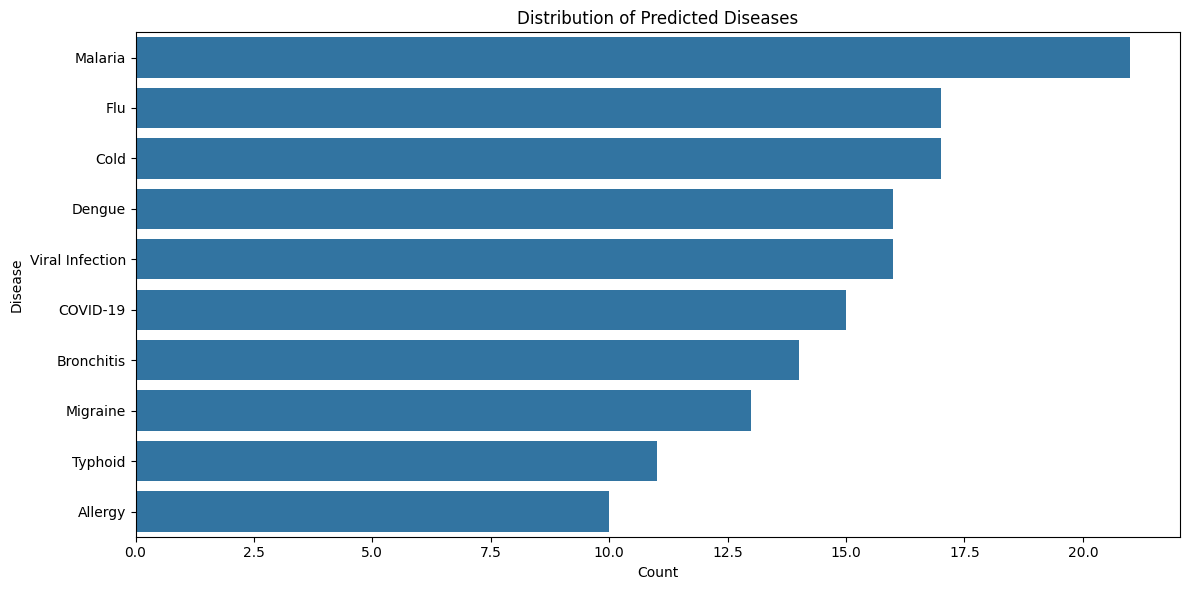

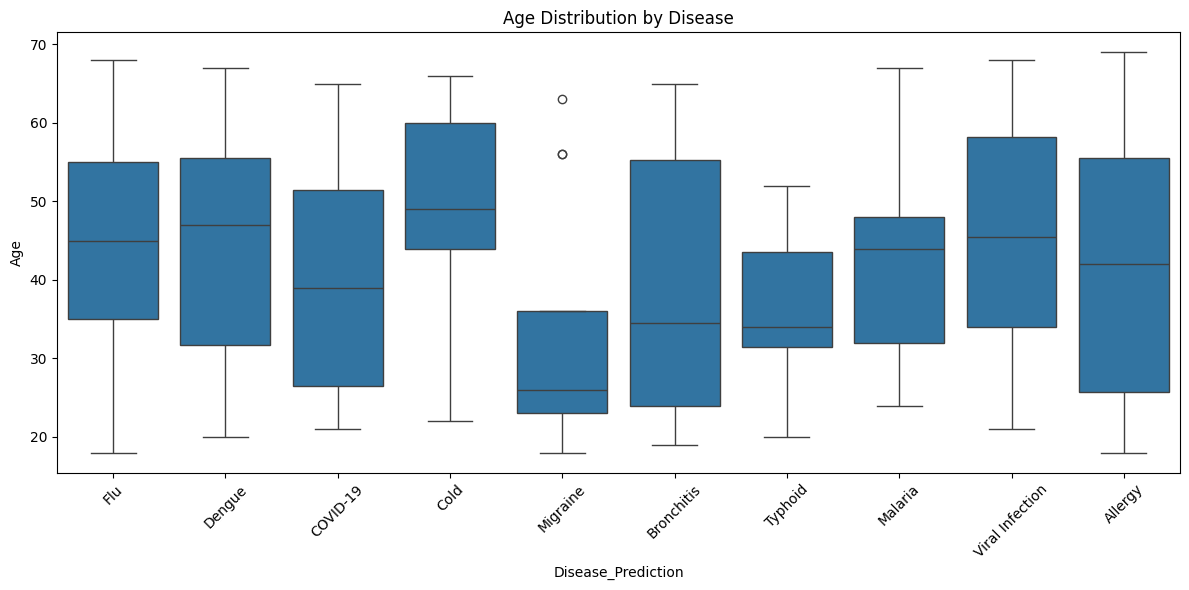


Most Common Symptoms:
Vomiting      38
Headache      37
Sneezing      35
Nausea        35
Chest pain    35
Body Pain     35
Back pain     34
Rash          34
Fever         31
Runny nose    31
Name: count, dtype: int64


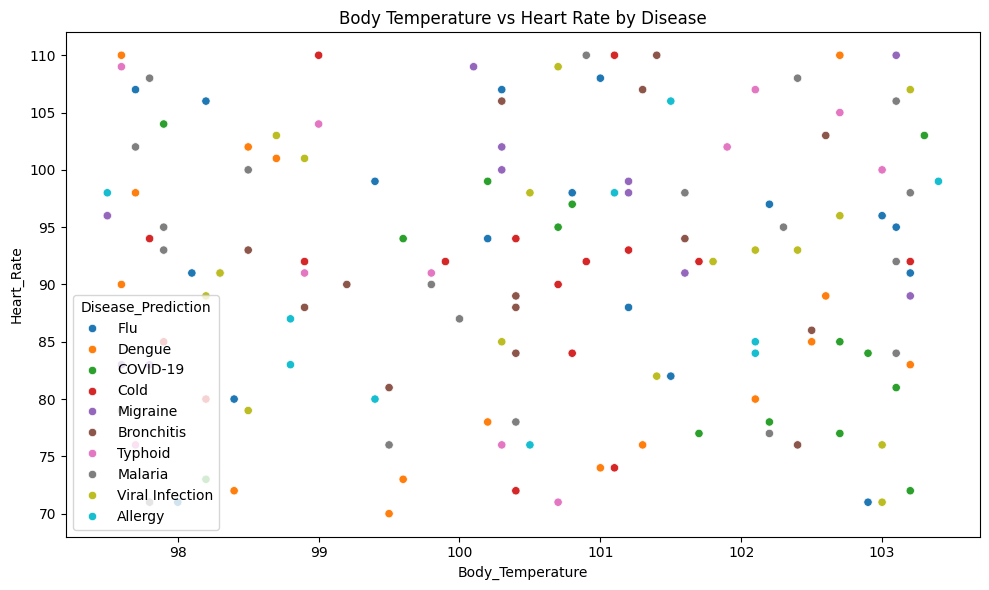

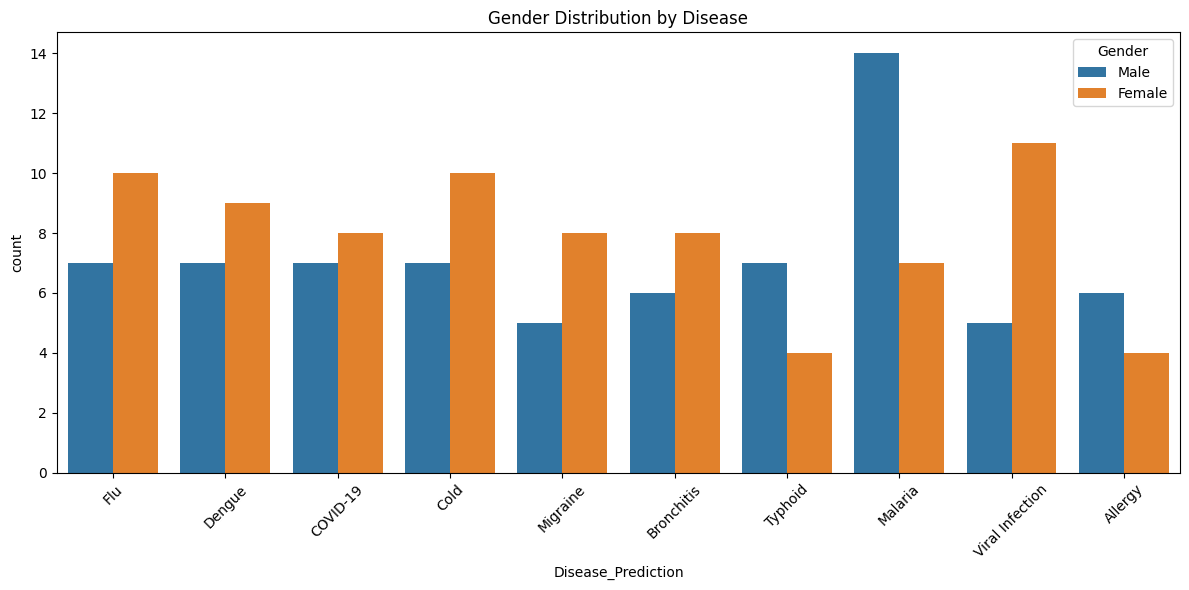


Prediction for symptoms ['Fever', 'Headache']:
Disease_Prediction
Cold               9
Dengue             8
Malaria            8
Viral Infection    7
Flu                6
Bronchitis         6
COVID-19           5
Typhoid            5
Migraine           4
Allergy            4
Name: count, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('human_disease_prediction_150.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFirst 5 records:")
print(df.head())

# Data cleaning and preprocessing
# Convert temperature to numeric (remove °F)
df['Body_Temperature'] = df['Body_Temperature'].str.replace('°F', '').astype(float)
df['Heart_Rate'] = df['Heart_Rate'].str.replace(' bpm', '').astype(int)
df['Duration'] = df['Duration'].str.replace(' days', '').astype(int)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Disease distribution
print("\nDisease Distribution:")
print(df['Disease_Prediction'].value_counts())

# Visualization: Disease distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Disease_Prediction', order=df['Disease_Prediction'].value_counts().index)
plt.title('Distribution of Predicted Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

# Age distribution by disease
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Disease_Prediction', y='Age')
plt.title('Age Distribution by Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Common symptoms analysis
symptoms = df[['Symptom_1', 'Symptom_2', 'Symptom_3']]
all_symptoms = pd.concat([symptoms.Symptom_1, symptoms.Symptom_2, symptoms.Symptom_3])
print("\nMost Common Symptoms:")
print(all_symptoms.value_counts().head(10))

# Correlation between vitals and diseases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Body_Temperature', y='Heart_Rate', hue='Disease_Prediction')
plt.title('Body Temperature vs Heart Rate by Disease')
plt.tight_layout()
plt.show()

# Gender distribution of diseases
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease_Prediction', hue='Gender')
plt.title('Gender Distribution by Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to predict possible diseases based on symptoms
def predict_disease(symptoms_list):
    mask = (df['Symptom_1'].isin(symptoms_list)) | \
           (df['Symptom_2'].isin(symptoms_list)) | \
           (df['Symptom_3'].isin(symptoms_list))
    return df[mask]['Disease_Prediction'].value_counts()

# Example usage
print("\nPrediction for symptoms ['Fever', 'Headache']:")
print(predict_disease(['Fever', 'Headache']))

# Save cleaned data
df.to_csv('cleaned_human_disease_prediction.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(file_path):
    """
    Preprocess the disease prediction dataset

    Parameters:
    file_path (str): Path to the CSV file

    Returns:
    tuple: (X_train, X_test, y_train, y_test, label_encoders, scaler)
    """

    # Load the dataset
    df = pd.read_csv(file_path)

    # 1. Data Cleaning

    # Convert temperature to numeric
    df['Body_Temperature'] = df['Body_Temperature'].str.replace('°F', '').astype(float)

    # Convert heart rate to numeric
    df['Heart_Rate'] = df['Heart_Rate'].str.replace(' bpm', '').astype(int)

    # Convert duration to numeric (days)
    df['Duration'] = df['Duration'].str.replace(' days', '').astype(int)

    # Check for missing values
    print("Missing values before handling:")
    print(df.isnull().sum())

    # Handle missing values if any (example using mean for numeric, mode for categorical)
    numeric_cols = ['Age', 'Weight', 'Duration', 'Body_Temperature', 'Heart_Rate']
    categorical_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3']

    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)

    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print("\nMissing values after handling:")
    print(df.isnull().sum())

    # 2. Feature Engineering

    # Calculate BMI (example of creating a new feature)
    # Note: Height isn't available, so we can't calculate actual BMI
    # This is just an example of feature engineering
    # df['BMI'] = df['Weight'] / (df['Height']**2)

    # 3. Encoding Categorical Variables

    label_encoders = {}

    # Encode categorical features
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Encode target variable
    le_disease = LabelEncoder()
    df['Disease_Prediction'] = le_disease.fit_transform(df['Disease_Prediction'])
    label_encoders['Disease'] = le_disease

    # 4. Feature Selection

    # Drop columns that won't be used as features
    X = df.drop(['Name', 'Disease_Prediction'], axis=1)
    y = df['Disease_Prediction']

    # 5. Train-Test Split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 6. Feature Scaling

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Save processed data (optional)
    # pd.DataFrame(X_train_scaled).to_csv('X_train.csv', index=False)
    # pd.DataFrame(X_test_scaled).to_csv('X_test.csv', index=False)
    # y_train.to_csv('y_train.csv', index=False)
    # y_test.to_csv('y_test.csv', index=False)

    # Print summary
    print("\nPreprocessing Summary:")
    print(f"Original data shape: {df.shape}")
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    print("\nFirst 5 rows of processed training data:")
    print(pd.DataFrame(X_train_scaled).head())

    return X_train_scaled, X_test_scaled, y_train, y_test, label_encoders, scaler

# Example usage
if __name__ == "__main__":
    file_path = "human_disease_prediction_150.csv"
    X_train, X_test, y_train, y_test, label_encoders, scaler = preprocess_data(file_path)

    # You can access the label encoders for each column if needed later
    # For example, to get original disease names:
    # disease_names = label_encoders['Disease'].classes_

Missing values before handling:
Name                  0
Age                   0
Gender                0
Weight                0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Duration              0
Body_Temperature      0
Heart_Rate            0
Disease_Prediction    0
dtype: int64

Missing values after handling:
Name                  0
Age                   0
Gender                0
Weight                0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Duration              0
Body_Temperature      0
Heart_Rate            0
Disease_Prediction    0
dtype: int64

Preprocessing Summary:
Original data shape: (150, 11)
Training data shape: (105, 9)
Test data shape: (45, 9)

First 5 rows of processed training data:
          0         1         2         3         4         5         6  \
0  0.074313 -0.832796  0.220916  1.001820 -0.180014 -0.025825 -0.498559   
1  0.746973  1.200775  1.124457 -1.592579  1.538299 -0.272339  0.955572   
2  0.

=== Dataset Overview ===
Number of records: 150
Number of features: 11

First 5 records:
     Name  Age  Gender  Weight    Symptom_1    Symptom_2 Symptom_3 Duration  \
0   Surya   20    Male    60.3        Fever       Nausea  Sneezing   3 days   
1   Pooja   64  Female    56.8    Back pain   Chest pain  Headache   5 days   
2  Vikram   49    Male    75.0  Sore throat      Fatigue      Rash   2 days   
3  Anjali   63  Female    76.9         Rash  Sore throat  Sneezing   4 days   
4    Neha   48  Female    72.6   Chest pain     Vomiting  Headache   3 days   

  Body_Temperature Heart_Rate Disease_Prediction  
0          100.3°F    107 bpm                Flu  
1          103.2°F     83 bpm             Dengue  
2          102.7°F     77 bpm           COVID-19  
3          101.0°F    108 bpm                Flu  
4          100.4°F     94 bpm               Cold  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 # 

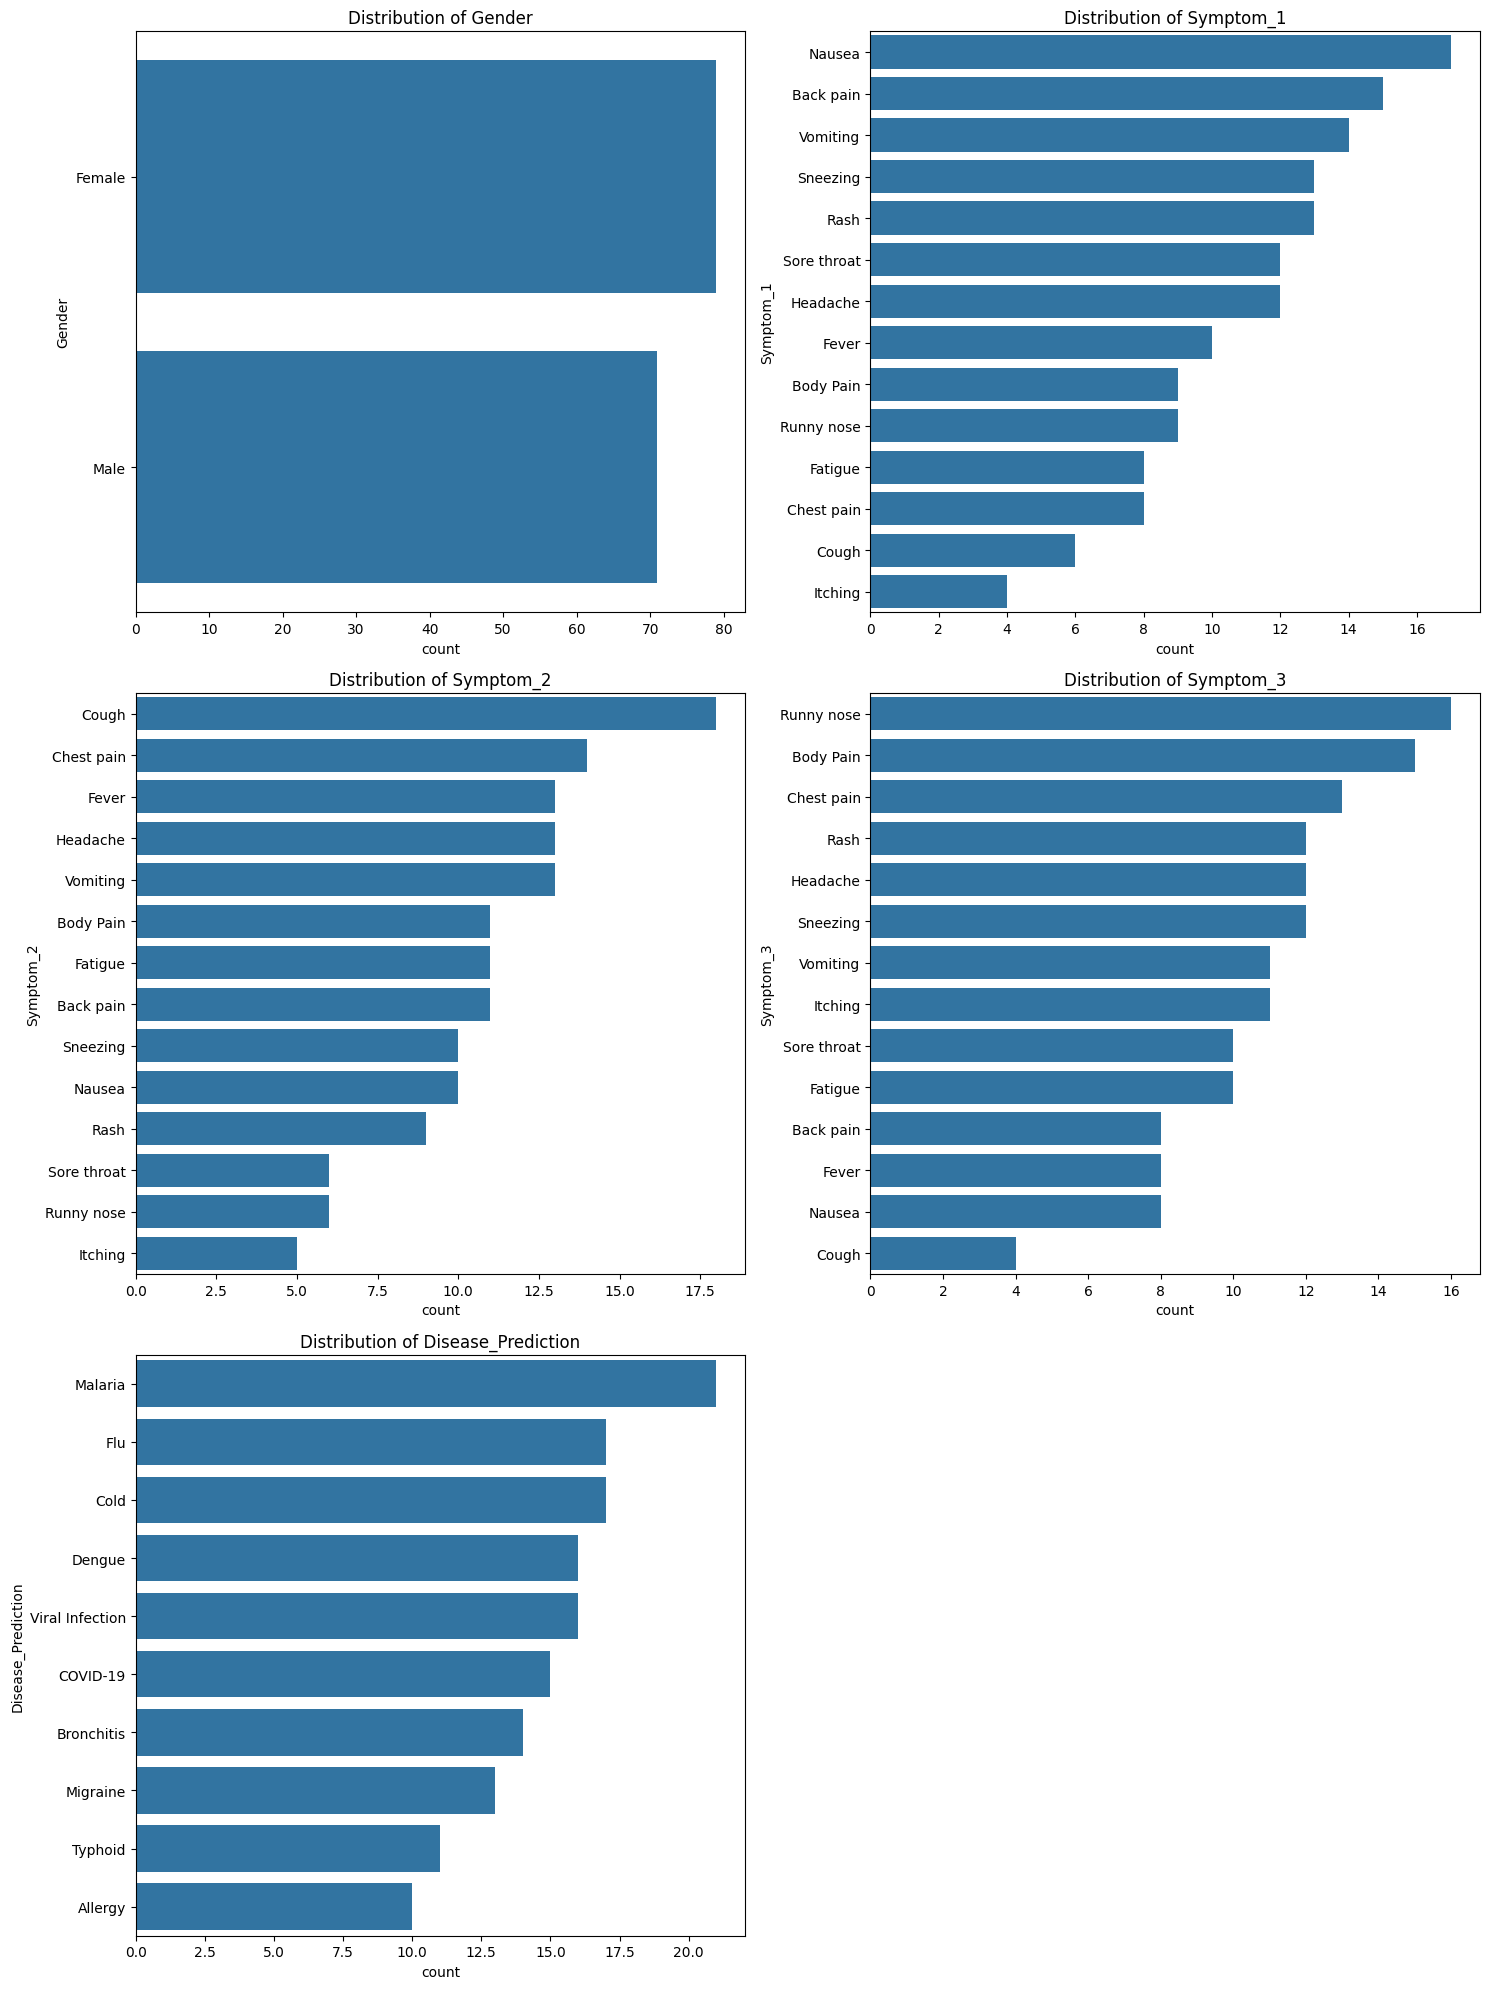

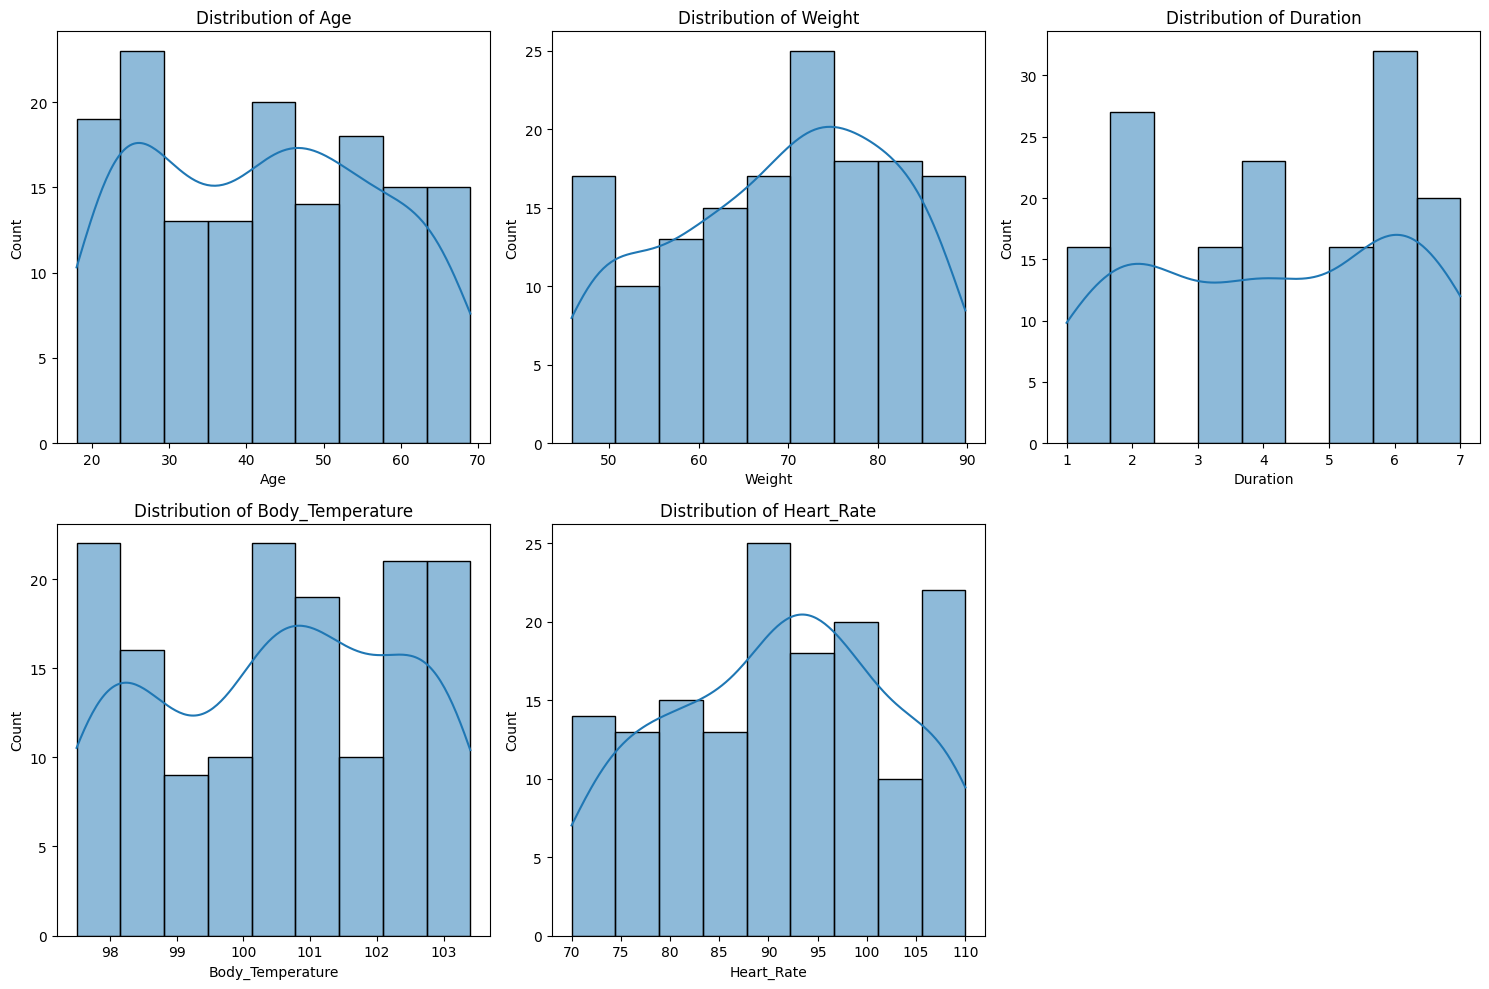

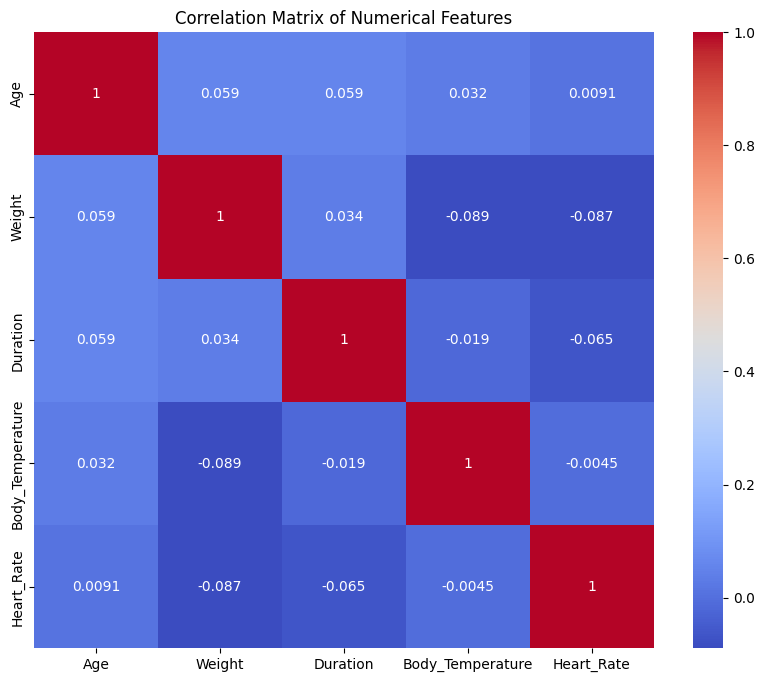

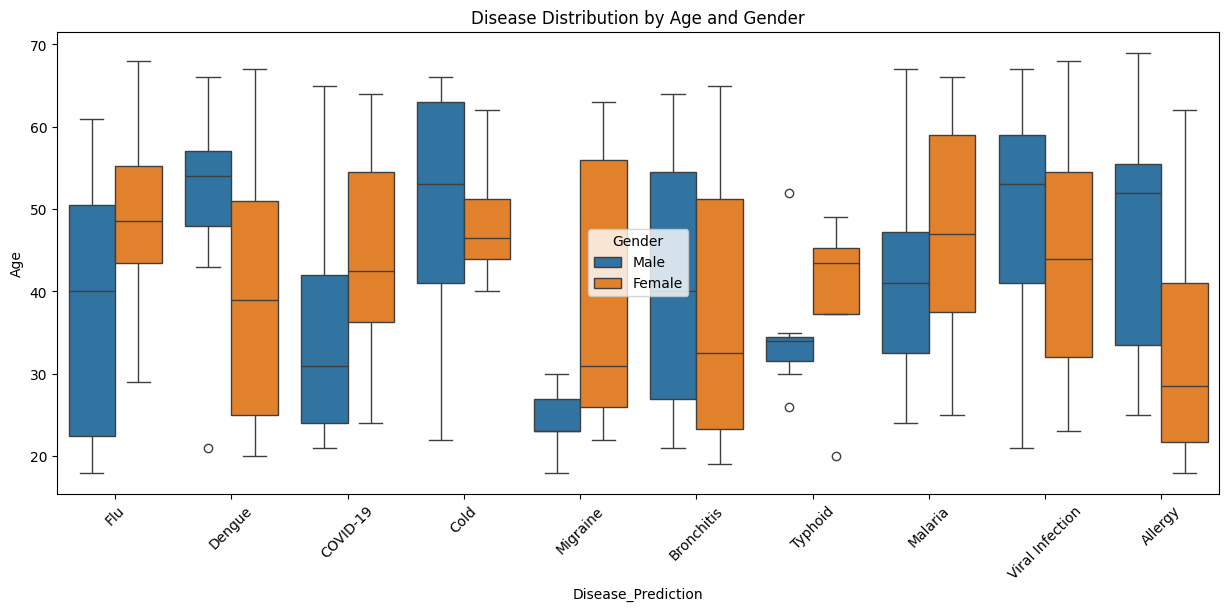

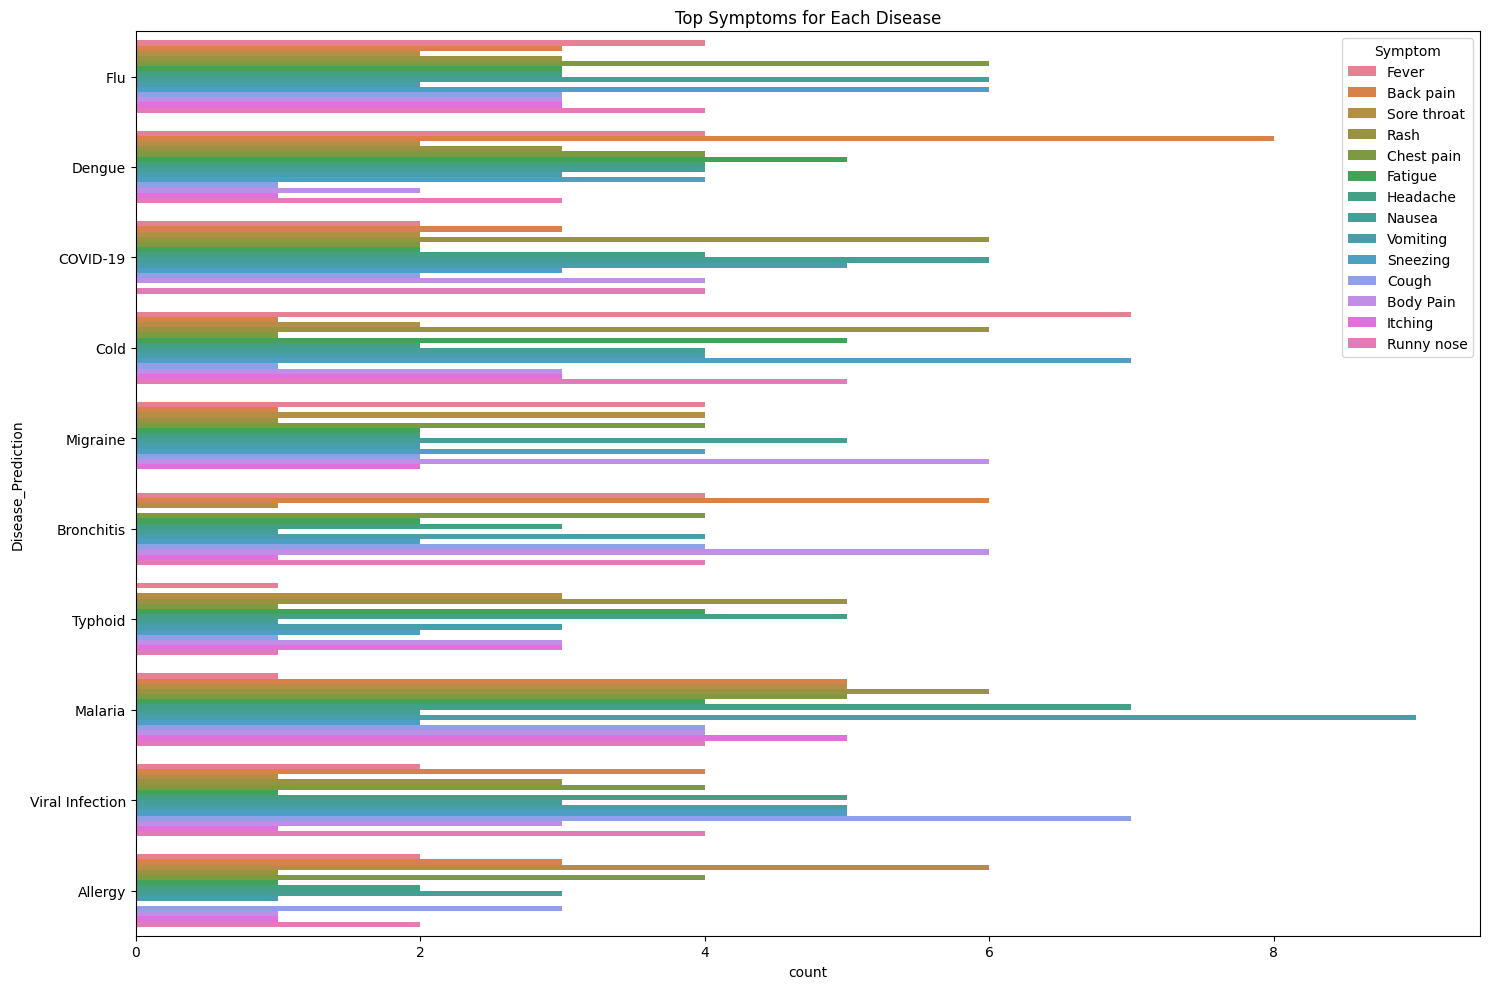

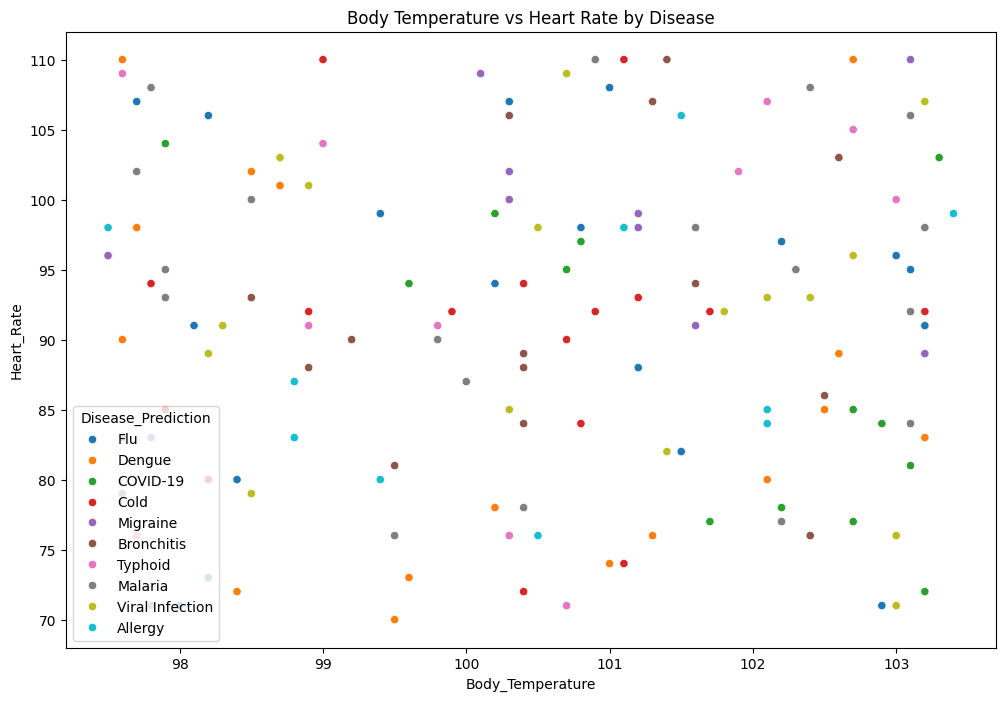

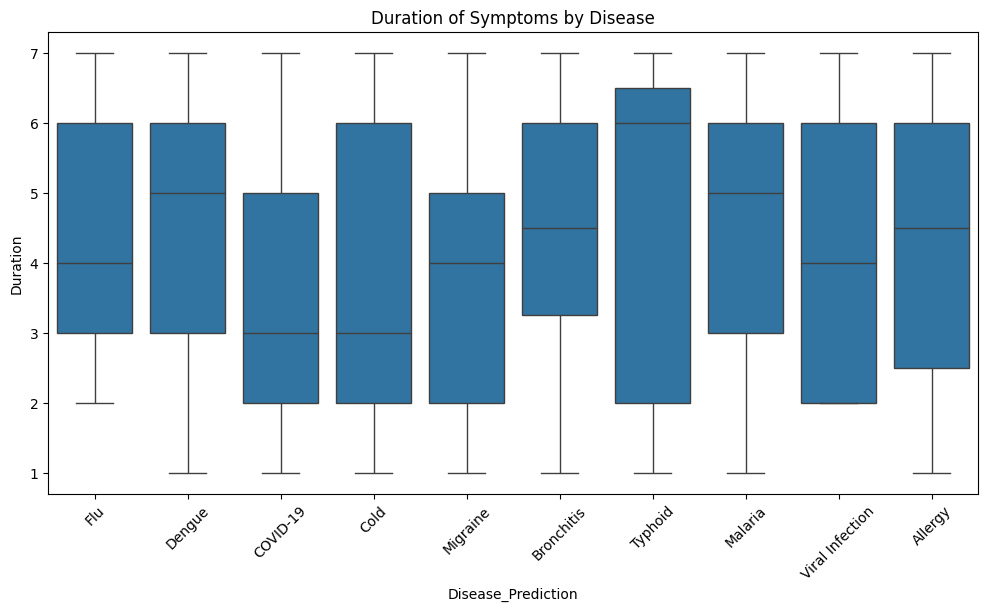

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('human_disease_prediction_150.csv')

# 1. Basic Dataset Overview
print("=== Dataset Overview ===")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFirst 5 records:")
print(df.head())
print("\nDataset information:")
print(df.info())

# 2. Data Cleaning
# Convert 'Duration' to numeric by extracting days
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Convert temperature to numeric
df['Body_Temperature'] = df['Body_Temperature'].str.replace('°F', '').astype(float)

# Convert heart rate to numeric
df['Heart_Rate'] = df['Heart_Rate'].str.replace(' bpm', '').astype(float)

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# 3. Descriptive Statistics
print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

# 4. Categorical Features Analysis
categorical_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Disease_Prediction']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# 5. Numerical Features Analysis
numerical_cols = ['Age', 'Weight', 'Duration', 'Body_Temperature', 'Heart_Rate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# 6. Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 7. Disease Distribution by Age and Gender
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Disease_Prediction', y='Age', hue='Gender')
plt.title('Disease Distribution by Age and Gender')
plt.xticks(rotation=45)
plt.show()

# 8. Top Symptoms for Each Disease
disease_symptoms = pd.melt(df, id_vars=['Disease_Prediction'],
                          value_vars=['Symptom_1', 'Symptom_2', 'Symptom_3'],
                          value_name='Symptom')

plt.figure(figsize=(15, 10))
sns.countplot(data=disease_symptoms, y='Disease_Prediction', hue='Symptom')
plt.title('Top Symptoms for Each Disease')
plt.tight_layout()
plt.show()

# 9. Body Temperature vs Heart Rate by Disease
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Body_Temperature', y='Heart_Rate', hue='Disease_Prediction')
plt.title('Body Temperature vs Heart Rate by Disease')
plt.show()

# 10. Duration of Symptoms by Disease
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Disease_Prediction', y='Duration')
plt.title('Duration of Symptoms by Disease')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Random Forest Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.00      0.00      0.00         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.00      0.00      0.00         7
         Dengue       0.00      0.00      0.00         3
            Flu       0.09      0.33      0.14         3
        Malaria       0.10      0.14      0.12         7
       Migraine       0.33      0.50      0.40         4
        Typhoid       0.25      0.33      0.29         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.11        45
      macro avg       0.08      0.13      0.09        45
   weighted avg       0.07      0.11      0.08        45



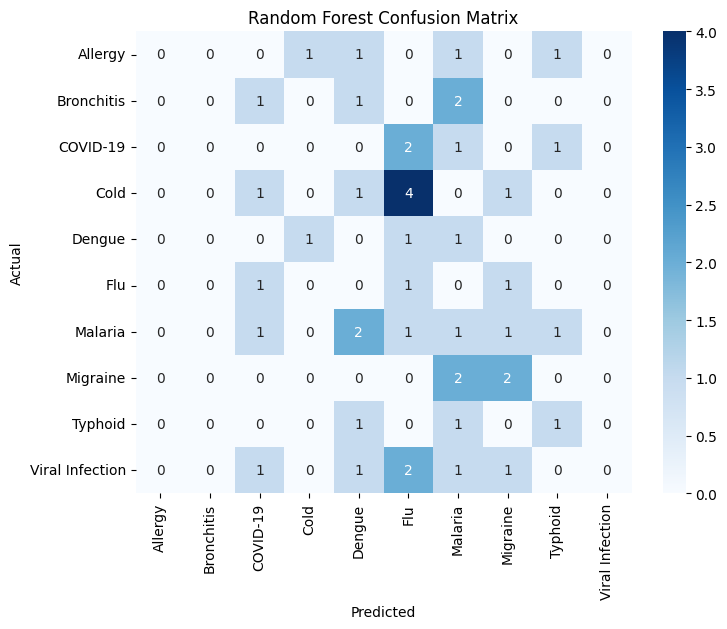

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


SVM Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.00      0.00      0.00         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.00      0.00      0.00         7
         Dengue       0.00      0.00      0.00         3
            Flu       0.29      0.67      0.40         3
        Malaria       0.17      0.57      0.27         7
       Migraine       0.50      0.25      0.33         4
        Typhoid       0.00      0.00      0.00         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.16        45
      macro avg       0.10      0.15      0.10        45
   weighted avg       0.09      0.16      0.10        45



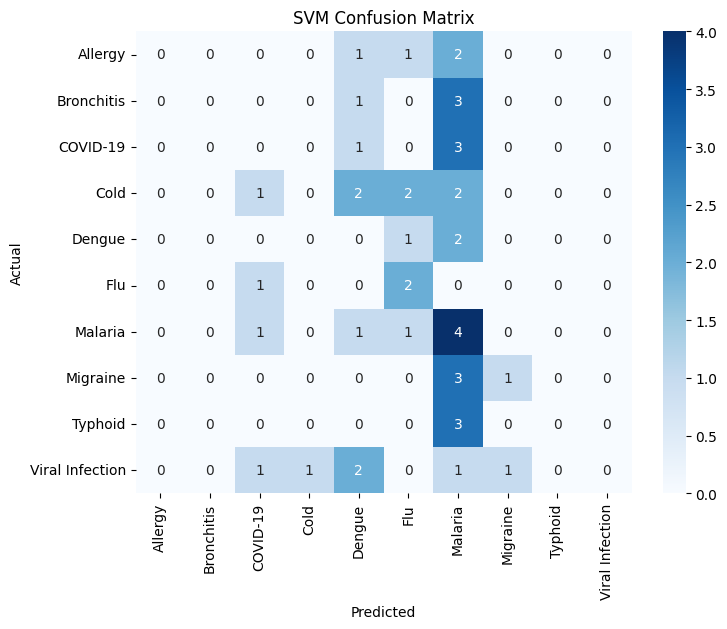

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Logistic Regression Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.00      0.00      0.00         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.17      0.14      0.15         7
         Dengue       0.11      0.33      0.17         3
            Flu       0.00      0.00      0.00         3
        Malaria       0.18      0.29      0.22         7
       Migraine       0.00      0.00      0.00         4
        Typhoid       0.00      0.00      0.00         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.09        45
      macro avg       0.05      0.08      0.05        45
   weighted avg       0.06      0.09      0.07        45



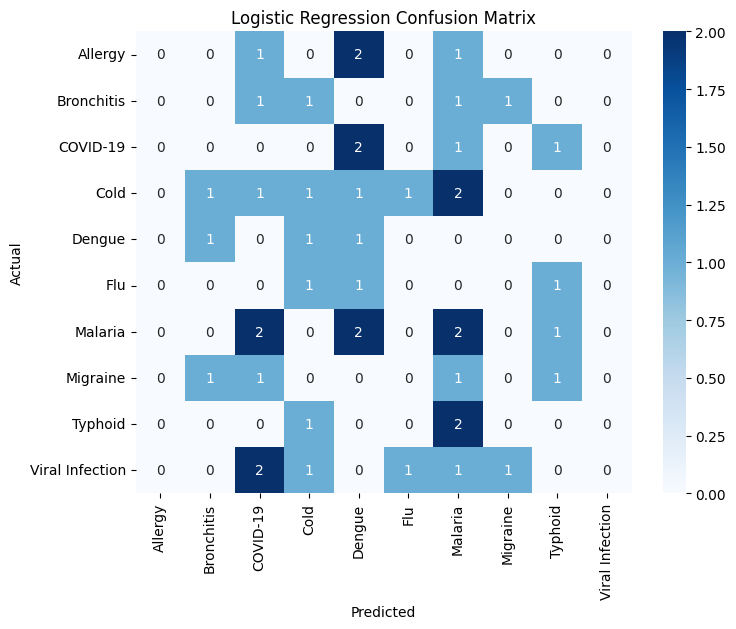


Decision Tree Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.00      0.00      0.00         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.25      0.14      0.18         7
         Dengue       0.00      0.00      0.00         3
            Flu       0.00      0.00      0.00         3
        Malaria       0.12      0.14      0.13         7
       Migraine       0.33      0.25      0.29         4
        Typhoid       0.00      0.00      0.00         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.07        45
      macro avg       0.07      0.05      0.06        45
   weighted avg       0.09      0.07      0.07        45



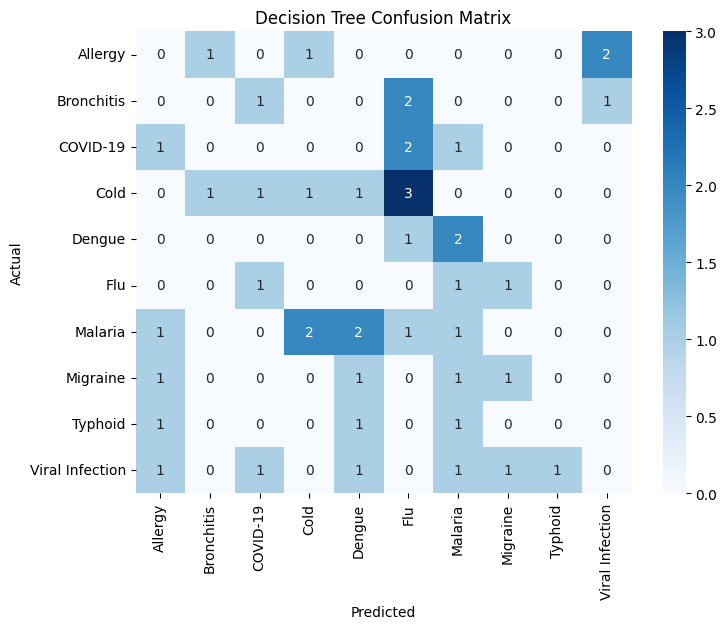

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Naive Bayes Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.50      0.25      0.33         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.00      0.00      0.00         7
         Dengue       0.00      0.00      0.00         3
            Flu       0.14      0.33      0.20         3
        Malaria       0.09      0.14      0.11         7
       Migraine       0.33      0.25      0.29         4
        Typhoid       0.00      0.00      0.00         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.09        45
      macro avg       0.11      0.10      0.09        45
   weighted avg       0.10      0.09      0.09        45



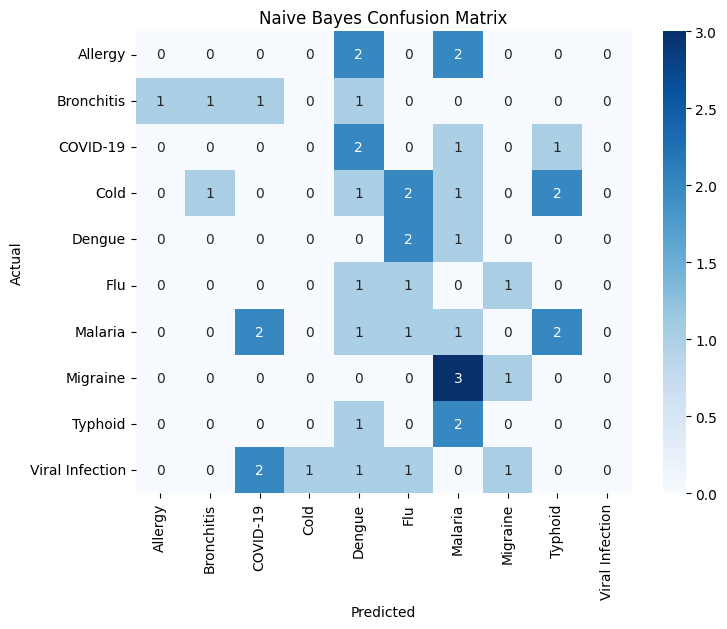

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


XGBoost Classification Report:
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         4
     Bronchitis       0.33      0.25      0.29         4
       COVID-19       0.00      0.00      0.00         4
           Cold       0.00      0.00      0.00         7
         Dengue       0.10      0.33      0.15         3
            Flu       0.17      0.33      0.22         3
        Malaria       0.00      0.00      0.00         7
       Migraine       0.00      0.00      0.00         4
        Typhoid       0.17      0.33      0.22         3
Viral Infection       0.00      0.00      0.00         6

       accuracy                           0.09        45
      macro avg       0.08      0.12      0.09        45
   weighted avg       0.06      0.09      0.07        45



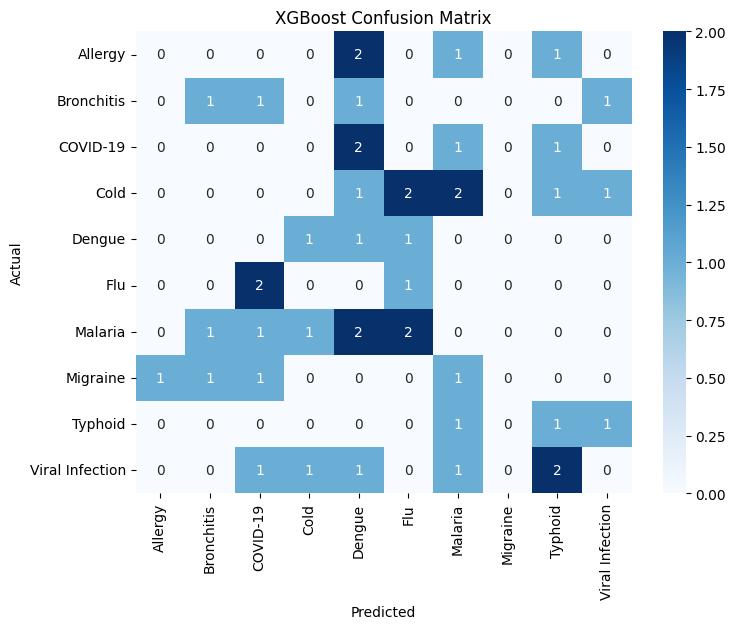


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.111111   0.067912  0.111111  0.082428
SVM                  0.155556   0.090545  0.155556  0.097778
Logistic Regression  0.088889   0.061616  0.088889  0.069611
Decision Tree        0.066667   0.087963  0.066667  0.074420
Naive Bayes          0.088889   0.097739  0.088889  0.085644
XGBoost              0.088889   0.058519  0.088889  0.065283


<Figure size 1200x600 with 0 Axes>

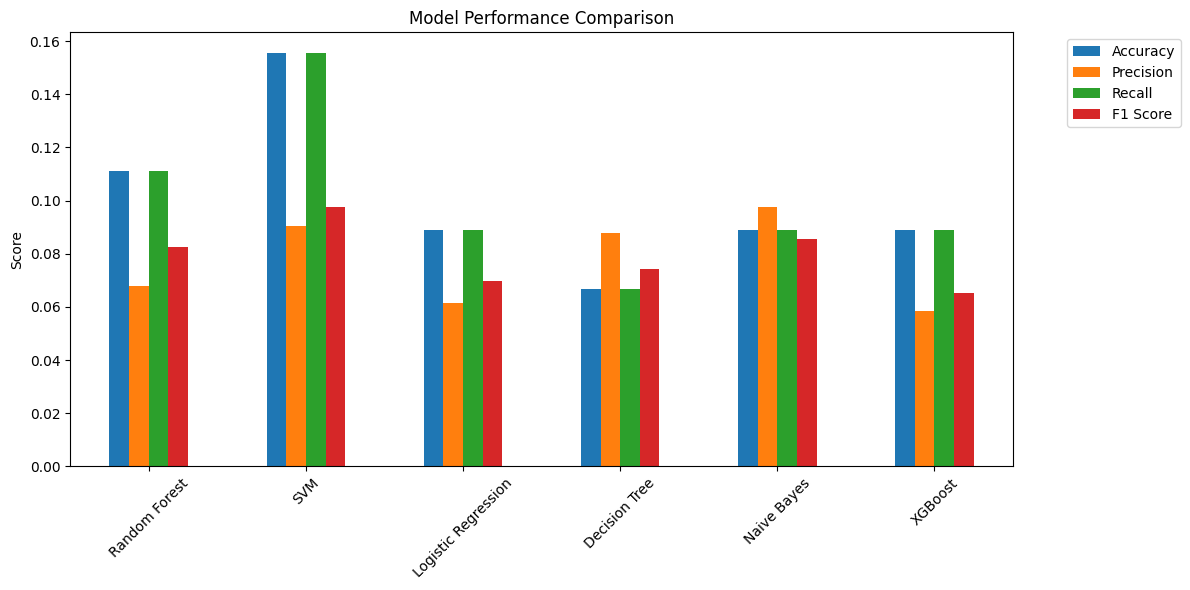

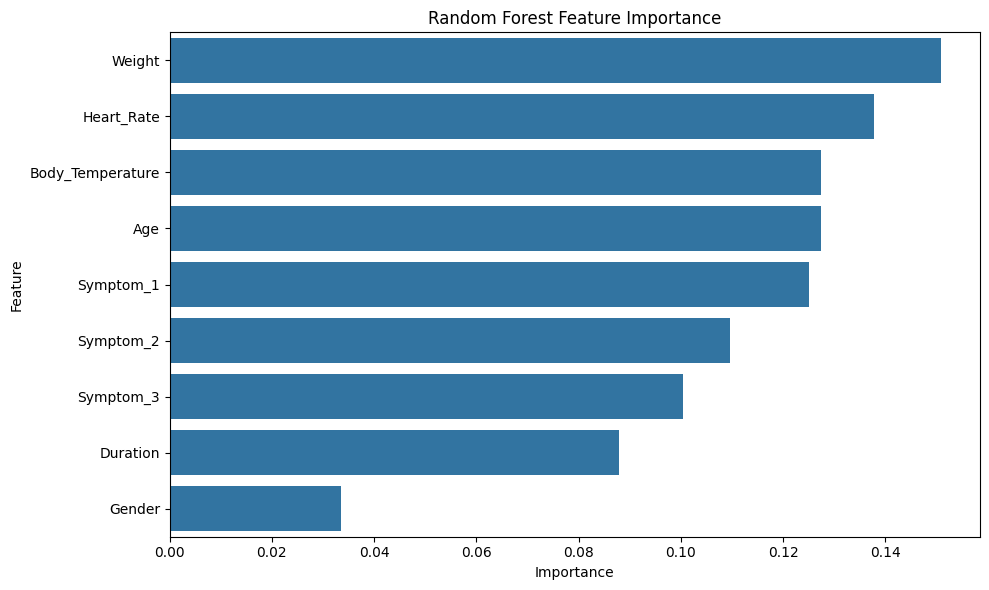

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('human_disease_prediction_150.csv')

# Data Preprocessing
# Convert temperature to numeric
df['Body_Temperature'] = df['Body_Temperature'].str.replace('°F', '').astype(float)
# Convert heart rate to numeric
df['Heart_Rate'] = df['Heart_Rate'].str.replace(' bpm', '').astype(int)
# Convert duration to numeric (days)
df['Duration'] = df['Duration'].str.replace(' days', '').astype(int)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable
le_disease = LabelEncoder()
df['Disease_Prediction'] = le_disease.fit_transform(df['Disease_Prediction'])

# Feature selection
X = df.drop(['Name', 'Disease_Prediction'], axis=1)
y = df['Disease_Prediction']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le_disease.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_disease.classes_,
                yticklabels=le_disease.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Plot model comparison
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature importance for Random Forest (as an example)
rf = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()